# Step by step ML guide - end to end project
Analog to the and inspired by the fantastic book [`Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition`](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/) by Aurélien Géron!
* This jupyter notebook is based on `Chapter 2 – End-to-end Machine Learning project` of the above mentioned book. The original jupyter notebook can be found [`here`](https://github.com/ageron/handson-ml2).

## Scikit-Learn & Python
This notebook is done with **scikit-learn version 0.21.3** and **Python 3.7.5**. See also the [`API Reference`](https://scikit-learn.org/stable/modules/classes.html) of scikit-learn.

## Setup

#### Use operating system dependent functionality
[`os`](https://docs.python.org/3/library/os.html) provides a portable way of using operating system dependent functionality

In [268]:
import os

[`numpy`](http://www.numpy.org/) is the fundamental package for scientific computing with Python.
<br>
[`pandas`](https://pandas.pydata.org/pandas-docs/stable/#module-pandas) providing high-performance, easy-to-use data structures and data analysis tools.

In [269]:
import numpy as np
import pandas as pd

#### Ploting figures
[`matplotlib`](https://matplotlib.org/) for plotting functions - use `%matplotlib inline` to plot the figures inline (inside the notebook)

In [270]:
%matplotlib inline       
import matplotlib as mpl
import matplotlib.pyplot as plt

Set the number of CPUs to be used by to the parameter `n_jobs`.

In [271]:
# set tne numbers of processors to be used
# value 1 -> use 1 CPU
# value 2 -> use 2 CPUs ...
# value -1 -> use all CPUs
# value -2 -> use all but one CPU ...
n_cpus = -2

### Get the data
Get the data from the web as a zipped file, save the zipped data and extract it.
<br>
[`tarfile`](https://docs.python.org/3/library/tarfile.html) makes it possible to read and write tar archives, including those using gzip, bz2 and lzma compression

In [272]:
import tarfile
import urllib

# source from where to download the data
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# path to store the downloaded data
HOUSING_PATH = os.path.join("datasets", "housing")

# fetch the data from the romote source given by data_url, save and extract it within the given data_path
def fetch_data(data_url=HOUSING_URL, data_path=HOUSING_PATH):
    # create the new HOUSING_PATH directory if it does not exist
    if not os.path.isdir(data_path):
        os.makedirs(data_path)
    # specify the douwnload file
    tgz_path = os.path.join(data_path, "housing.tgz")
    # receive the data from the web
    urllib.request.urlretrieve(data_url, tgz_path)
    # extract the datafile
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=data_path)
    housing_tgz.close()

# call the function to fetch, store and extract the data
fetch_data()

Convert the `CSV` file into a pandas `DataFrame` file.

In [273]:
def load_csv_data(csv_path):
    return pd.read_csv(csv_path)

In [274]:
CSV_PATH = os.path.join(HOUSING_PATH, 'housing.csv')
housing = load_csv_data(CSV_PATH)

### Gain insight into the data

In [275]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [276]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [277]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [278]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### Plot the data as histograms

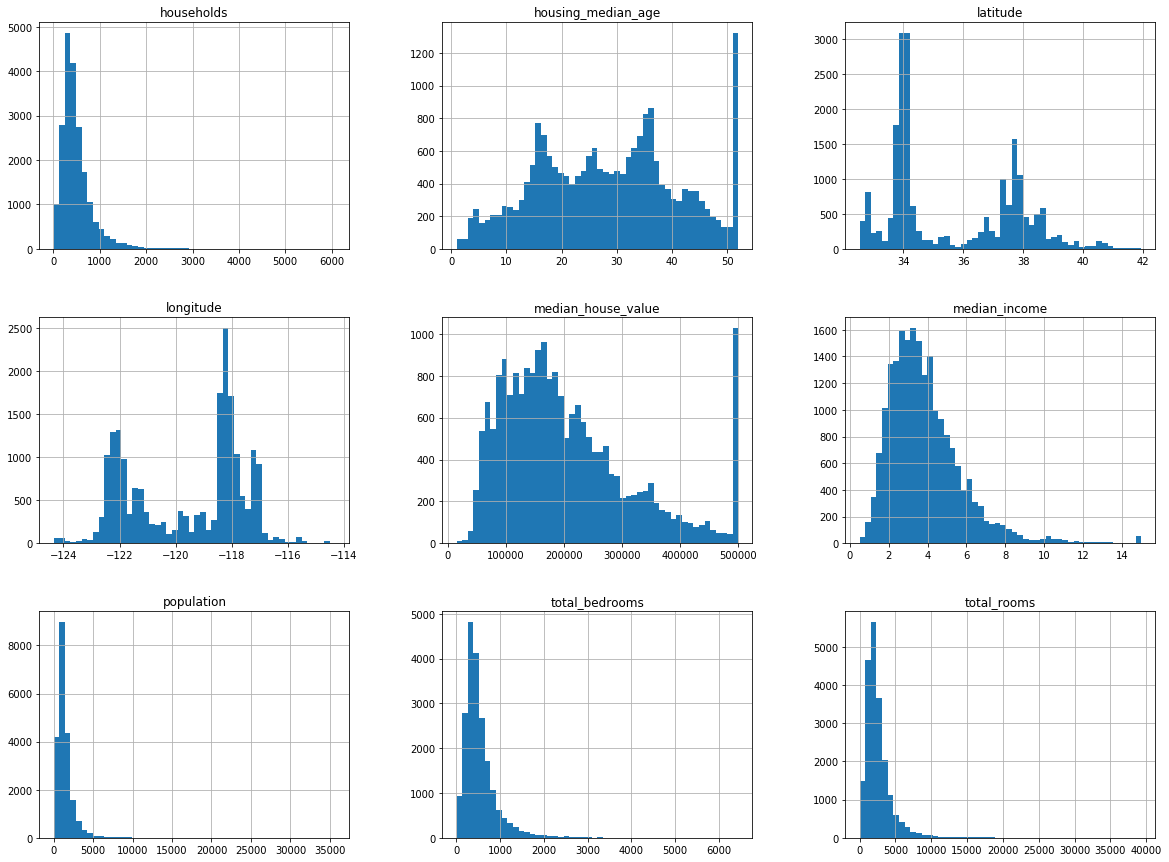

In [279]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

**HINT:** use `data.describe()` and [`data.hist()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html) to get a good understanding of the distribution of the data. Min, max, median and count are important information about the data. With the help of the histograms it's easy to gain information of the distribution of the data. 

Use the `range` parameter of the pandas `hist` method to "zoom into" the data distribution.

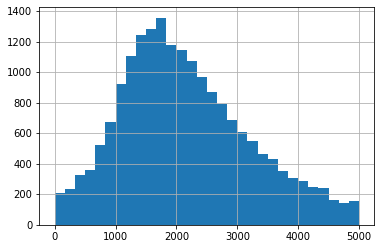

In [280]:
housing['total_rooms'].hist(bins=30, range=(0,5000))
plt.show()

### Split the date into the training-set & the test-set

Implement a function for splitting the data

In [281]:
# set the random number generators seed to get the same results on identical data sets 
np.random.seed(42)

def split_train_test(data, test_ratio):
    shuffeld_indicies = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffeld_indicies[:test_set_size]
    train_indices = shuffeld_indicies[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

Now split the data with a test-set size ration of 0.2

In [282]:
X_train, X_test = split_train_test(housing, 0.2)

In [283]:
print('housing setsize: {}, \ntrain set size: {}, \ntestset size: {}'.
      format(len(housing), len(X_train), len(X_test)))

housing setsize: 20640, 
train set size: 16512, 
testset size: 4128


In [284]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


Use [`sklearn.model_selection.train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) for splitting the data.

In [285]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(housing, test_size = 0.2, random_state = 42)

In [286]:
print('housing setsize: {}, \ntrain set size: {}, \ntestset size: {}'.
      format(len(housing), len(X_train), len(X_test)))

housing setsize: 20640, 
train set size: 16512, 
testset size: 4128


In [287]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


### Stratified split
Add the new category `income_cat` *temporarily* to categorize the `median_income` into discrete bins, to achieve a **stratified split** of the data. 
<br>
Use [`pandas.cut()`](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html) to bin the values into discrete intervals. 

In [288]:
housing['income_cat'] = pd.cut(housing['median_income'], 
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [289]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


Get all rows with income_cat == 5

In [290]:
housing.loc[housing['income_cat'] == 5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,5
122,-122.23,37.85,52.0,2800.0,411.0,1061.0,403.0,6.3434,373600.0,NEAR BAY,5
...,...,...,...,...,...,...,...,...,...,...,...
20501,-118.71,34.30,20.0,1586.0,187.0,699.0,209.0,6.5483,335000.0,<1H OCEAN,5
20503,-118.75,34.33,27.0,534.0,85.0,243.0,77.0,8.2787,330000.0,<1H OCEAN,5
20504,-118.73,34.29,11.0,5451.0,736.0,2526.0,752.0,7.3550,343900.0,<1H OCEAN,5
20505,-118.72,34.29,22.0,3266.0,529.0,1595.0,494.0,6.0368,248000.0,<1H OCEAN,5


Plot the distribution of the `income_cat` category.

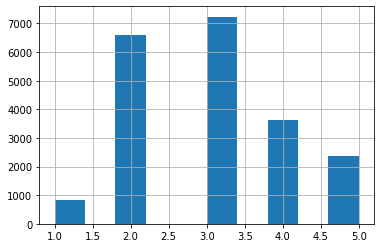

In [291]:
housing['income_cat'].hist()
plt.show()

In [292]:
housing['income_cat'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

In [293]:
X_train, X_test = train_test_split(housing, test_size = 0.2, random_state = 42)
X_train.info(), X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 11 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
income_cat            16512 non-null category
dtypes: category(1), float64(9), object(1)
memory usage: 1.4+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 20046 to 3665
Data columns (total 11 columns):
longitude             4128 non-null float64
latitude              4128 non-null float64
housing_median_age    4128 non-null float64
total_rooms           4128 non-null float64
total_bedrooms        3921 non-null floa

(None, None)

In [294]:
X_train['income_cat'].value_counts()

3    5756
2    5242
4    2948
5    1910
1     656
Name: income_cat, dtype: int64

In [295]:
X_train['income_cat'].value_counts() / len(X_train)

3    0.348595
2    0.317466
4    0.178537
5    0.115673
1    0.039729
Name: income_cat, dtype: float64

Use [`StratifiedShuffleSplit`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) to get the **correct proportion** of the stratified values concerning the attribute `income_cat`.

In [296]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    X_train_strat = housing.loc[train_index]
    X_test_strat = housing.loc[test_index]

In [297]:
X_train_strat['income_cat'].value_counts()

3    5789
2    5265
4    2911
5    1889
1     658
Name: income_cat, dtype: int64

In [298]:
X_train_strat['income_cat'].value_counts() / len(X_train_strat)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [299]:
housing['income_cat'].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

Calculate the error / difference between a random and a stratified split of the data and compare it with the overall proportions

In [300]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

# random split of tha data
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(X_test_strat),
    "Random": income_cat_proportions(X_test),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


### Conclusion / reason for stratified split
To maintain the proportion of the original data ***concerning a special attribute*** a stratified split should be prefered instead of a random split.

**Drop / delete the 'income_cat' attribute: it is not needed any more after the date has been splitted.**

In [301]:
for set_ in (X_train_strat, X_test_strat):
    set_.drop('income_cat', axis=1, inplace=True)

**<u>Hint</u>:**
***X_train_strat*** and ***X_test_strat*** will be kept for further work. 

In [302]:
X_train_strat

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN


### Discover and visualize the data to gain further insights
From now on we are working on the *X_train_strat* training set. Make a copy of it for further investigation.
<br>
*X_train_strat* itself will be left unchanged!

In [303]:
housing = X_train_strat.copy()

Visualize the housing data via a scatter plot! Use [`pandas.DataFrame.plot`](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html)

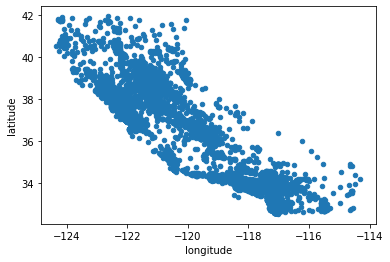

In [304]:
housing.plot(kind='scatter', x = 'longitude', y = 'latitude')
plt.show()

Include the density (parameter alpha) into the plot.

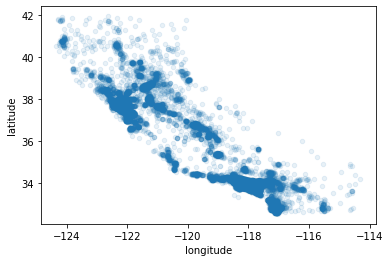

In [305]:
housing.plot(kind='scatter', x = 'longitude', y = 'latitude', alpha=0.1)
plt.show()

Now lets plot the prices together with the population size.
<br>
"If kind = ‘scatter’ and the **argument c** is the name of a dataframe column, the values of that column are used to color each point."

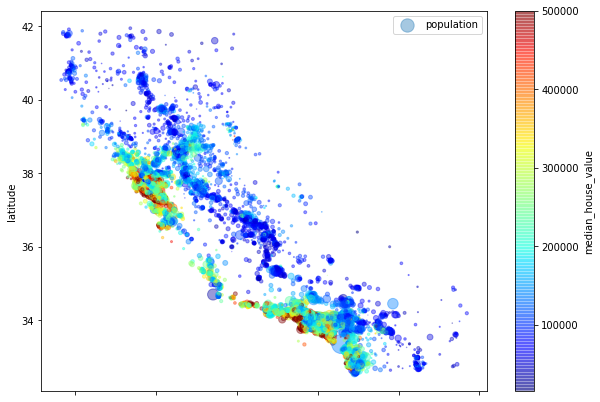

In [306]:
housing.plot(kind ='scatter', x = 'longitude', y = 'latitude', alpha=0.4,
            s = housing['population']/100, label='population', figsize=(10,7),
            c = 'median_house_value', cmap=plt.get_cmap('jet'), colorbar=True,
            )
plt.legend()
plt.show()

### Correlations
Compute the ***standard correlation coefficient*** between the different **numerical attributes**. 

In [307]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [308]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

##### Plot the correlations
Plot the correlations between the following four attributes: `median_house_value`, `median_income`, `total_rooms`, `housing_median_age`. Use [`pandas.plotting.scatter_matrix`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html) for plotting the correlations.

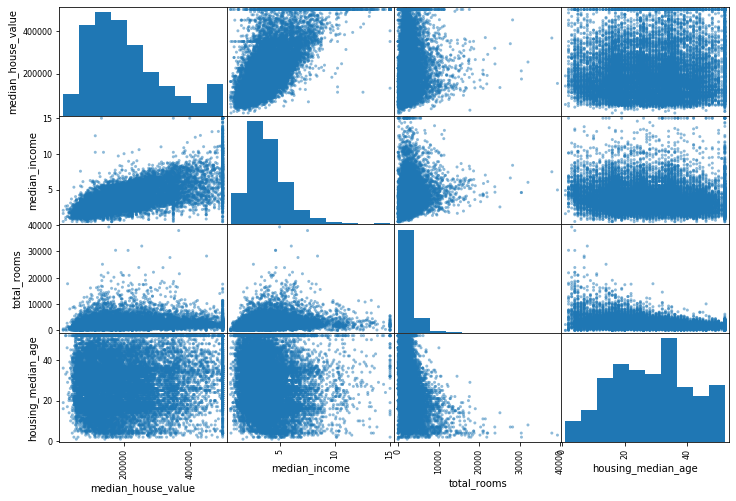

In [309]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

*There is a clear correlation between the `median_house_value` and the `median_income` attribute!*

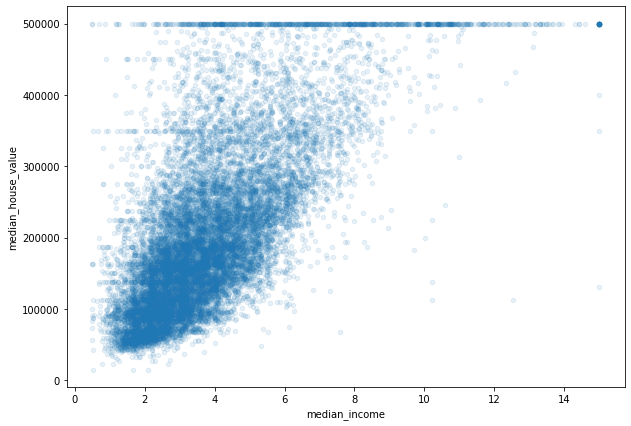

In [310]:
housing.plot(kind='scatter', x = 'median_income', y = 'median_house_value', alpha=0.1, figsize=(10,7))
plt.show()

Generate new attributes out of the given attributes. The new attributes may hold more valid information about the correlation of the attributes.

In [311]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,4.505810,0.231341,3.047847


In [312]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

Plot the correlation between `rooms_per_household` and `median_house_value`

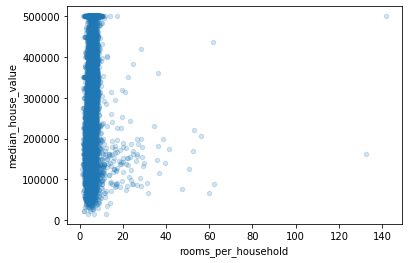

In [313]:
housing.plot(kind='scatter', x = 'rooms_per_household', y = 'median_house_value', alpha = 0.2 )

plt.xlabel('rooms_per_household')
plt.ylabel('median_house_value')
plt.show()

Now focus on the interesting part of the data and discard the outliers / huge values for `rooms_per_household`

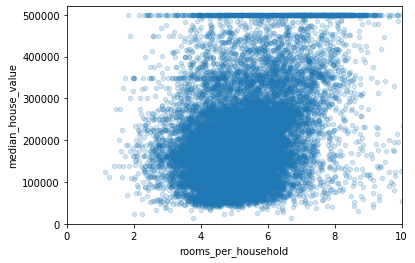

In [314]:
housing.plot(kind='scatter', x = 'rooms_per_household', y = 'median_house_value', alpha = 0.2 )

# scale the values to focus on the real / correct values
plt.axis([0, 10, 0, 520000])

plt.xlabel('rooms_per_household')
plt.ylabel('median_house_value')
plt.show()

Use pandas.DataFrame.describe() to gain more insights into the data (especially the max values)

In [315]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724,5.440341,0.212878,3.096437
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830,2.611712,0.057379,11.584826
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000,4.442040,0.175304,2.431287
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000,5.232284,0.203031,2.817653
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000,6.056361,0.239831,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


## Prepare the data for machine learning algorithms

#### Drop the labels from the training set and move them into the "label set"

In [316]:
housing = X_train_strat.drop('median_house_value', axis=1)
y_train = X_train_strat['median_house_value'].copy()

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


Check for missing values within the attributes.

In [317]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


The attribute `total_bedrooms` has 158 missing values with a `NaN` value.

In [318]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)]
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
3376,-118.28,34.25,29.0,2559.0,NaN,1886.0,769.0,2.6036,<1H OCEAN
4691,-118.37,34.07,50.0,2519.0,NaN,1117.0,516.0,4.3667,<1H OCEAN
6052,-117.76,34.04,34.0,1914.0,NaN,1564.0,328.0,2.8347,INLAND
17198,-119.75,34.45,6.0,2864.0,NaN,1404.0,603.0,5.5073,NEAR OCEAN


There are three possibilities to **handle missing values**:
* delete the entries with the missing values
* delete the hole attribute with the missing values
* fill the missing values with the median value of that attribute

**Option 1:** Delete the entries with the missing values. This isn't done inplace thus housing itself has not been changed.

In [319]:
housing.dropna(subset=['total_bedrooms'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


In [320]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


**Option 2:** Delete the hole attribute with the missing values.

In [321]:
housing.drop(['total_bedrooms'], axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,1356.0,356.0,4.0625,<1H OCEAN


**Option 3:** Fill the missing values with the median value of that attribute.

In [322]:
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median, inplace=True)
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


In [323]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


### sklearn.impute.SimpleImputer class
Use [`sklearn.impute.SimpleImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) class for replacing missing values. 

In [324]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

**Attention:** Remove all non-numerical attribute(s) because median can only be calculated on numerical attributes.

In [325]:
housing_num = housing.drop('ocean_proximity', axis=1)
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


Fit the `imputer` instance to the data.

In [326]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

Display the calculated median values for all attributes. 

In [327]:
imputer.statistics_

array([-118.5,   34.3,   29. , 2119.5,  433. , 1164. ,  408. ,    3.5])

Use the `transform` method to replace the missing values. **The result is a numpy array!**

In [328]:
X = imputer.transform(housing_num)
X

array([[-121.9,   37.3,   38. , ...,  710. ,  339. ,    2.7],
       [-121.9,   37. ,   14. , ...,  306. ,  113. ,    6.4],
       [-117.2,   32.8,   31. , ...,  936. ,  462. ,    2.9],
       ...,
       [-116.4,   34.1,    9. , ..., 2098. ,  765. ,    3.3],
       [-118. ,   33.8,   31. , ..., 1356. ,  356. ,    4.1],
       [-122.5,   37.8,   52. , ..., 1269. ,  639. ,    3.6]])

Transform the numpy array back to a pandas DataFrame!

In [329]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


Check if the replacement was successful.

In [330]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662
...,...,...,...,...,...,...,...,...
3376,-118.28,34.25,29.0,2559.0,433.0,1886.0,769.0,2.6036
4691,-118.37,34.07,50.0,2519.0,433.0,1117.0,516.0,4.3667
6052,-117.76,34.04,34.0,1914.0,433.0,1564.0,328.0,2.8347
17198,-119.75,34.45,6.0,2864.0,433.0,1404.0,603.0,5.5073


### Preprocessing categorical attributes
After preprocessing the numerical attributes we now preprocess the categorical attributes. 

In [331]:
housing_cat = housing[['ocean_proximity']] # use [[ ]] to get a pandas DataFrame object ([] yields a Series object)
print(type(housing_cat))
housing_cat.head(10)

<class 'pandas.core.frame.DataFrame'>


,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [332]:
housing_cat['ocean_proximity'].value_counts()

<1H OCEAN     7276
INLAND        5263
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

### Ordinal-Encoder
Use [`OrdinalEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) to transform the categorical values of the attribute `ocean_proximity` into numerical values. OrdinalEncoder is available from Scikit-Learn version 0.20 on. The OrdinalEncoder replaces the categorical value by a numerical value. The result is a one dimensional array with values from `0` up to `n-1` for `n` categorical objects. The raising and therefore different values for the different categories are a disadvantage for machine learning algorithms because they give higher values more importance than lower values. The solution for this problem is the one-hot-encoder.


In [333]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
print(type(housing_cat_encoded))
housing_cat_encoded[:10]

<class 'numpy.ndarray'>


array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

Show the list of categories used by the OrdinalEncoder.

In [334]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### One-Hot-Encoder
Create a binary attribute for each "value" within the categorical attribute using the [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). Transform the categorical values of the attribute `ocean_proximity` into binary values (0 or 1). The result is a matrix with `n` columns representing the `n` different categorical values. 

In [335]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()
housing_cat_1hot = one_hot_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

The result is a sparse matrix. Use to array to convert it into an array.

In [336]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

*Alternatively one can specify the encoder parameter sparse = False to get a dense matrix (array) rather than a sparse matrix:*

In [337]:
one_hot_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = one_hot_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [338]:
one_hot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Customer specific transformer function
Build a customer specific transformation function. This transformation function is used to add the new attributes `rooms_per_household`, `population_per_household` and (if set) `bedrooms_per_room`.
<br>
Implement the methods `fit()`, `transform()` and `fit_transform()` to be consistent with the `Scikit-Learn` functionalities such as pipelines.
<br>
* By adding the [`TransformerMixin`](https://scikit-learn.org/stable/modules/generated/sklearn.base.TransformerMixin.html) you get `fit_transform()` for free.
* By adding the [`BaseEstimator`](https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html) you get the methods `get_params()` and `set_params()` that can be used for automatic hypeparameter tuning.

In [339]:
from sklearn.base import BaseEstimator, TransformerMixin

# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y = None):
        return self # nothing else to do
    def transform(self, X, y = None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_addr = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_addr.transform(housing.values)

Alternatively, you can use Scikit-Learn's [`FunctionTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html) class that lets you easily create a transformer based on a transformation function. In the example above `add_extra_features` is the transformation function.

In [340]:
housing_extra_attribs

array([[-121.89, 37.29, 38.0, ..., '<1H OCEAN', 4.625368731563422,
        2.094395280235988],
       [-121.93, 37.05, 14.0, ..., '<1H OCEAN', 6.008849557522124,
        2.7079646017699117],
       [-117.2, 32.77, 31.0, ..., 'NEAR OCEAN', 4.225108225108225,
        2.0259740259740258],
       ...,
       [-116.4, 34.09, 9.0, ..., 'INLAND', 6.34640522875817,
        2.742483660130719],
       [-118.01, 33.82, 31.0, ..., '<1H OCEAN', 5.50561797752809,
        3.808988764044944],
       [-122.45, 37.77, 52.0, ..., 'NEAR BAY', 4.843505477308295,
        1.9859154929577465]], dtype=object)

Convert *housing_extra_attribs* to a pandas DataFrame

In [341]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs, 
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"])

In [342]:
housing_extra_attribs

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785
...,...,...,...,...,...,...,...,...,...,...,...
16507,-118.13,34.2,46,1271,236,573,210,4.9312,INLAND,6.05238,2.72857
16508,-117.56,33.88,40,1196,294,1052,258,2.0682,INLAND,4.63566,4.07752
16509,-116.4,34.09,9,4855,872,2098,765,3.2723,INLAND,6.34641,2.74248
16510,-118.01,33.82,31,1960,380,1356,356,4.0625,<1H OCEAN,5.50562,3.80899


### Piplenes & scaling
Build pipelines for preprocessing the attributes. Use [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline) for pipelines and [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) for scaling the values of the attributes. There are different scalers one can use. See [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) for further information.

In [343]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # check and handle missing values
    ('attribs_addr', CombinedAttributesAdder(add_bedrooms_per_room=True)), # add attributes
    #('attribs_adder', FunctionTransformer(add_extra_features, validate=False)), # add attributes
    ('std_scaler', StandardScaler()), # scale the data
])

In [344]:
housing_num_attr = num_pipeline.fit_transform(housing_num)
housing_num_attr

array([[-1.2,  0.8,  0.7, ..., -0.3, -0.1,  0.2],
       [-1.2,  0.7, -1.2, ...,  0.2, -0. , -0.8],
       [ 1.2, -1.3,  0.2, ..., -0.5, -0.1,  0.4],
       ...,
       [ 1.6, -0.7, -1.6, ...,  0.3, -0. , -0.5],
       [ 0.8, -0.9,  0.2, ...,  0. ,  0.1, -0.3],
       [-1.4,  1. ,  1.9, ..., -0.2, -0.1,  0.1]])

## Final preprocessing step
Use `ColumnTransformer` for the final preprocessing steps (pipeline):
<br>
1. Use num_pipeline for the numerical attributes:
    * Use `SimpleImputer()` to check and handle missing values
    * Use `CombinedAttributesAdder()` to add new attributes
    * Use `StandardScaler()` to scale the numerical data
2. Use `OneHotEncoder()` to preprocess the categorical attributes

**[`ColumnTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html#sklearn.compose.ColumnTransformer)** applies transformers to columns of an array or pandas DataFrame. "This estimator allows different columns or column subsets of the input to be transformed separately and *the features generated by each transformer will be concatenated to form a single feature space*. This is useful for heterogeneous or columnar data, to combine several feature extraction mechanisms or transformations into a single transformer." See the [`users guide`](https://scikit-learn.org/stable/modules/compose.html#column-transformer) for more information on how to use it.

In [345]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,533.998123,1419.790819,497.060380,3.875589
std,2.001860,2.138058,12.574726,2138.458419,410.839621,1115.686241,375.720845,1.904950
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.940000,18.000000,1443.000000,296.000000,784.000000,279.000000,2.566775
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900
75%,-118.010000,37.720000,37.000000,3141.000000,641.000000,1719.250000,602.000000,4.744475
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


In [346]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs), # encode the categorical data
    ])

housing_prepared = full_pipeline.fit_transform(housing)

housing_prepared

array([[-1.2,  0.8,  0.7, ...,  0. ,  0. ,  0. ],
       [-1.2,  0.7, -1.2, ...,  0. ,  0. ,  0. ],
       [ 1.2, -1.3,  0.2, ...,  0. ,  0. ,  1. ],
       ...,
       [ 1.6, -0.7, -1.6, ...,  0. ,  0. ,  0. ],
       [ 0.8, -0.9,  0.2, ...,  0. ,  0. ,  0. ],
       [-1.4,  1. ,  1.9, ...,  0. ,  1. ,  0. ]])

In [347]:
housing_prep = pd.DataFrame(housing_prepared)
housing_prep

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,-0.312055,-0.086499,0.155318,1.0,0.0,0.0,0.0,0.0
1,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,0.217683,-0.033534,-0.836289,1.0,0.0,0.0,0.0,0.0
2,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.465315,-0.092405,0.422200,0.0,0.0,0.0,0.0,1.0
3,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,-0.079661,0.089736,-0.196453,0.0,1.0,0.0,0.0,0.0
4,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,-0.357834,-0.004194,0.269928,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.722267,-0.673331,1.379547,-0.632123,-0.725361,-0.759010,-0.764049,0.554158,0.234352,-0.031755,-0.428853,0.0,1.0,0.0,0.0,0.0
16508,1.007011,-0.823004,0.902385,-0.667196,-0.584183,-0.329664,-0.636291,-0.948815,-0.308114,0.084689,0.491503,0.0,1.0,0.0,0.0,0.0
16509,1.586489,-0.724781,-1.562952,1.043901,0.822735,0.607904,0.713156,-0.316705,0.346934,-0.030554,-0.521776,0.0,1.0,0.0,0.0,0.0
16510,0.782213,-0.851068,0.186642,-0.309919,-0.374849,-0.057178,-0.375451,0.098121,0.024995,0.061509,-0.303407,1.0,0.0,0.0,0.0,0.0


In [348]:
X_train_prep = housing_prepared.copy()
X_train_prep.shape

(16512, 16)

**Now the training data has been prepared for machine learning!**

* the data has been fetched and loaded.
* the data has been studied.
* the data has been split into a training and a testing set. A stratified split has been used for this purpose. 
* the data has been visualised to get further insights into the data.
* the correlation between the numerical attributed has been performed
* reasonable attributes as a combination of other attributes have been added
* separate the "label" from the training data
* check for and handle missing (numerical) values within the attributes
* preprocess categorical attributes by one-hot encoding them
* add customer specific transformer functions (e.g. for adding new / combined attributes)
* scale the date to fit into the machine learning algorithms
* build pipelines for semi automatic data preprocessing

**Results of the preprocessing steps:**
* `X_train_prep`: the prepared training data
* `y_train`:    the labeled data for training
* `X_test_strat`: the unprepared testing data set

## Select and train a model

**Linear regression model:** [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

In [349]:
from sklearn.linear_model import LinearRegression

linReg = LinearRegression().fit(X_train_prep, y_train)
linReg.score(X_train_prep, y_train)

0.6481624842804428

Let's do some prediction with a few training instances. Use the full preprocessing pipeline to prepare the data.
<br>
Display the actual label values for the first five entries.

In [350]:
some_data = housing.iloc[:5]
some_labels = y_train.iloc[:5]
some_data_prep = full_pipeline.transform(some_data)
np.set_printoptions(precision=1)
print('Prediction: ', linReg.predict(some_data_prep))
#print('Prediction: {}'.format(linReg.predict(some_data_prep)))
print('Labes:   ', list(some_labels))

Prediction:  [210644.6 317768.8 210956.4  59219.  189747.6]
Labes:    [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


Measure the prediction error for the whole training set with the RMSE. 
<br>
Use [`mean_squared_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) to evaluate the prediction error. Convert the *mean squared error* into a *root mean squared error* by taking the square root. 

In [351]:
from sklearn.metrics import mean_squared_error

housing_prediction = linReg.predict(X_train_prep)
lin_mse = mean_squared_error(y_train, housing_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

Use [`mean_absolute_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error) to evaluate the prediction error.

In [352]:
from sklearn.metrics import mean_absolute_error

lin_mar = mean_absolute_error(y_train, housing_prediction)
lin_mar

49439.89599001897

**Decision tree model:**[`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor)

In [353]:
from sklearn.tree import DecisionTreeRegressor

treeReg = DecisionTreeRegressor().fit(X_train_prep, y_train)
treeReg.score(X_train_prep, y_train)

1.0

Make predictions with the decision tree model on the training data (data_prepared)

In [354]:
housing_prediction = treeReg.predict(X_train_prep)

Use [`mean_squared_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) to evaluate the prediction error. Convert the *mean squared error* into a *root mean squared error* by taking the square root.

In [355]:
dtree_mse = mean_squared_error(y_train, housing_prediction)
dtree_rmse = np.sqrt(dtree_mse)
dtree_rmse

0.0

**Random forest model:** [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)<br> <br>
**Note**: specify `n_estimators=10` to avoid a warning about the fact that the default value is going to change to 100 in Scikit-Learn 0.22.

In [356]:
from sklearn.ensemble import RandomForestRegressor

randForestReg = RandomForestRegressor(n_estimators = 10, random_state = 42, n_jobs=n_cpus)
randForestReg.fit(X_train_prep, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-2,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [357]:
randForestReg.score(X_train_prep, y_train)

0.9640626979494528

In [358]:
housing_prediction = randForestReg.predict(X_train_prep)

rand_forest_mse = mean_squared_error(y_train, housing_prediction)
rand_forest_rmse = np.sqrt(rand_forest_mse)
rand_forest_rmse

21933.31414779769

**Support vector machine model:**[`SVR`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR)

In [359]:
from sklearn.svm import SVR

svmReg = SVR(kernel='linear')
svmReg.fit(X_train_prep, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [360]:
svmReg.score(X_train_prep, y_train)

0.07801662018673838

In [361]:
housing_prediction = svmReg.predict(X_train_prep)

svmReg_mse = mean_squared_error(y_train, housing_prediction)
svmReg_rmse = np.sqrt(svmReg_mse)
svmReg_rmse

111094.6308539982

**Conclusion:**
* The linear regression model has a very high error on the training data. Thus it seems to underfit pretty heavily
* The decision tree model has no error at all on the training data. Therefore it is pretty obvious that it is heavily overfitting.
* The random forest seems to generate the best result.
* The support vector generates the highest RMSE of all four models. 

## Fine-tune the model

### Cross validation

Use scikit-learns [`cros_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) for cross validation.

In [362]:
from sklearn.model_selection import cross_val_score

Define the helper function `display_scores` to print the results of the cross validation

In [363]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

*cross validation for the decision tree*

In [364]:
dtree_scores = cross_val_score(treeReg, X_train_prep, y_train, 
                               scoring='neg_mean_squared_error', 
                               n_jobs=n_cpus, cv = 10)
dtree_rmse_scores = np.sqrt(-dtree_scores)

display_scores(dtree_rmse_scores)

Scores: [68911.4 67793.7 71658.6 68636.5 70700.  74181.2 71409.6 69611.3 76298.8
 69943.5]
Mean: 70914.45361421161
Standard deviation: 2491.7689875855926


*cross validation for the linear regression model*

In [365]:
linReg_scores = cross_val_score(linReg, X_train_prep, y_train, 
                                scoring='neg_mean_squared_error', 
                                n_jobs=n_cpus, cv = 10)
linReg_rmse_scores = np.sqrt(-linReg_scores)

display_scores(linReg_rmse_scores)

Scores: [66782.7 66960.1 70348.  74739.6 68031.1 71193.8 64969.6 68281.6 71552.9
 67665.1]
Mean: 69052.46136345083
Standard deviation: 2731.674001798348


*cross validation for the random forest*

In [366]:
randForrest_scores = cross_val_score(randForestReg, X_train_prep, y_train, 
                                     scoring='neg_mean_squared_error', 
                                     n_jobs=n_cpus, cv = 10)
randForrest_rmse_scores = np.sqrt(-randForrest_scores)

display_scores(randForrest_rmse_scores)

Scores: [51646.4 48940.6 53050.9 54409.  50922.1 56482.5 51864.5 49760.9 55434.2
 53326.1]
Mean: 52583.72407377466
Standard deviation: 2298.353351147122


*cross validation for the support vector machine*

In [367]:
svm_scores = cross_val_score(svmReg, X_train_prep, y_train, 
                             scoring='neg_mean_squared_error', 
                             n_jobs=n_cpus, cv = 10)
svm_scores_rmse = np.sqrt(-svm_scores)

display_scores(svm_scores_rmse)

Scores: [105342.1 112489.2 110092.4 113403.2 110638.9 115675.8 110703.6 114476.9
 113756.2 111520.1]
Mean: 111809.84009600841
Standard deviation: 2762.393664321567


**Save the models with their parameters ans results.**

In [368]:
import joblib

joblib.dump(randForestReg, 'randForestReg.pkl')

['randForestReg.pkl']

### Grid Search - for RandomForestRegressor
[`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) helps you to find the best hyperparameter combination for given models. It provides an "Exhaustive search over specified parameter values for an estimator".

In [369]:
from sklearn.model_selection import GridSearchCV

**param_grid :** Dictionary or list of dictionaries with parameters names (string) as keys and lists of parameter settings to try as values, or a list of such dictionaries, in which case the grids spanned by each dictionary in the list are explored. This enables searching over any sequence of parameter settings.

In [370]:
param_grid = [
    {'n_estimators': [3,10,30,60,90], 'max_features':[2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features':[2,3,4]},
]

Compute the best parameter settings for the parameters `n_estimators` and `max_features` for the RandomForestRegressor.

In [371]:
randForestReg = RandomForestRegressor(random_state = 42)

grid_search = GridSearchCV(randForestReg, param_grid, n_jobs=n_cpus, cv = 5, 
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

grid_search.fit(X_train_prep, y_train)

/home/horst/anaconda3/envs/tf/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-2,
             param_grid=[{'max_features': [2, 4, 6, 8],
    

#### Grid search results
Best hyperparameter combination:

In [372]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 60}

Best estimator:

In [373]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=60,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

Best score:
<br>
**Attention:** grid_search.best_score_ is the negative mean squared error

In [374]:
np.sqrt(-grid_search.best_score_)

49201.146029655036

Get all results / scores of GridSearch

In [375]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.081189,0.004589,0.005040,0.000827,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.837622e+09,-4.147108e+09,...,-4.053749e+09,1.519609e+08,26,-1.064113e+09,-1.105142e+09,-1.116550e+09,-1.112342e+09,-1.129650e+09,-1.105559e+09,2.220402e+07
1,0.245810,0.014735,0.009557,0.000903,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.047771e+09,-3.254861e+09,...,-3.094381e+09,1.327046e+08,19,-5.927175e+08,-5.870952e+08,-5.776964e+08,-5.716332e+08,-5.802501e+08,-5.818785e+08,7.345821e+06
2,0.710276,0.098633,0.028624,0.003717,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.689185e+09,-3.021086e+09,...,-2.849913e+09,1.626879e+08,17,-4.381089e+08,-4.391272e+08,-4.371702e+08,-4.376955e+08,-4.452654e+08,-4.394734e+08,2.966320e+06
3,1.510687,0.017012,0.053924,0.001497,2,60,NaN,"{'max_features': 2, 'n_estimators': 60}",-2.571630e+09,-2.857530e+09,...,-2.734416e+09,1.519345e+08,14,-3.971146e+08,-3.912571e+08,-3.916831e+08,-3.977588e+08,-3.986862e+08,-3.953000e+08,3.169601e+06
4,2.210145,0.058535,0.075547,0.005683,2,90,NaN,"{'max_features': 2, 'n_estimators': 90}",-2.538648e+09,-2.809482e+09,...,-2.705248e+09,1.513038e+08,13,-3.821182e+08,-3.788154e+08,-3.749633e+08,-3.834599e+08,-3.832931e+08,-3.805300e+08,3.245599e+06
5,0.095688,0.013532,0.003115,0.000197,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.730181e+09,-3.786886e+09,...,-3.716852e+09,1.631421e+08,24,-9.865163e+08,-1.012565e+09,-9.169425e+08,-1.037400e+09,-9.707739e+08,-9.848396e+08,4.084607e+07
6,0.402750,0.003962,0.009710,0.000827,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.666283e+09,-2.784511e+09,...,-2.781611e+09,1.268562e+08,16,-5.097115e+08,-5.162820e+08,-4.962893e+08,-5.436192e+08,-5.160297e+08,-5.163863e+08,1.542862e+07
7,1.204367,0.009921,0.026928,0.001162,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.387153e+09,-2.588448e+09,...,-2.537877e+09,1.214603e+08,9,-3.838835e+08,-3.880268e+08,-3.790867e+08,-4.040957e+08,-3.845520e+08,-3.879289e+08,8.571233e+06
8,1.952454,0.268350,0.047695,0.002922,4,60,NaN,"{'max_features': 4, 'n_estimators': 60}",-2.300220e+09,-2.558990e+09,...,-2.481844e+09,1.302165e+08,7,-3.599900e+08,-3.547165e+08,-3.511521e+08,-3.658926e+08,-3.544150e+08,-3.572332e+08,5.173810e+06
9,3.488899,0.218758,0.081064,0.004182,4,90,NaN,"{'max_features': 4, 'n_estimators': 90}",-2.308041e+09,-2.525529e+09,...,-2.460374e+09,1.174624e+08,5,-3.520380e+08,-3.424476e+08,-3.387061e+08,-3.526308e+08,-3.429241e+08,-3.457493e+08,5.574822e+06


Let's focus on *mean_test_score* and *params*:

In [376]:
cvRes = grid_search.cv_results_

for mean_score, params in zip(cvRes['mean_test_score'], cvRes['params']):
    print(np.sqrt(-mean_score), params)

63669.05791727153 {'max_features': 2, 'n_estimators': 3}
55627.16171305252 {'max_features': 2, 'n_estimators': 10}
53384.57867637289 {'max_features': 2, 'n_estimators': 30}
52291.639566791055 {'max_features': 2, 'n_estimators': 60}
52011.99752320518 {'max_features': 2, 'n_estimators': 90}
60965.99185930139 {'max_features': 4, 'n_estimators': 3}
52740.98248528835 {'max_features': 4, 'n_estimators': 10}
50377.344409590376 {'max_features': 4, 'n_estimators': 30}
49818.10914327986 {'max_features': 4, 'n_estimators': 60}
49602.15463836165 {'max_features': 4, 'n_estimators': 90}
58663.84733372485 {'max_features': 6, 'n_estimators': 3}
52006.15355973719 {'max_features': 6, 'n_estimators': 10}
50146.465964159885 {'max_features': 6, 'n_estimators': 30}
49546.78938002555 {'max_features': 6, 'n_estimators': 60}
49413.37945823811 {'max_features': 6, 'n_estimators': 90}
57869.25504027614 {'max_features': 8, 'n_estimators': 3}
51711.09443660957 {'max_features': 8, 'n_estimators': 10}
49682.253459423

### Grid Search - for SVR
**param_grid :** Dictionary or list of dictionaries with parameters names (string) as keys and lists of parameter settings to try as values, or a list of such dictionaries, in which case the grids spanned by each dictionary in the list are explored. This enables searching over any sequence of parameter settings.

In [377]:
param_grid = [
    {'kernel': ['linear'], 'C':[100, 150, 200, 500, 1000, 5000, 10000]},
    #{'kernel': ['linear'], 'C':[1, 3,10, 30, 50, 70, 100, 150, 200, 500, 1000]},
    #{'kernel': ['rbf'], 'C':[0.1, 0.3, 1, 3,10, 30, 50, 70, 100], 'gamma':['scale', 'auto']},
]

In [378]:
svmReg = SVR()

grid_search_svm = GridSearchCV(svmReg, param_grid=param_grid, n_jobs=n_cpus, cv=5, 
                               scoring='neg_mean_squared_error', 
                               return_train_score=True)

grid_search_svm.fit(X_train_prep, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-2,
             param_grid=[{'C': [100, 150, 200, 500, 1000, 5000, 10000],
                          'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

#### Grid search results
Best hyperparameter combination:

In [379]:
grid_search_svm.best_params_

{'C': 5000, 'kernel': 'linear'}

Best estimator:

In [380]:
grid_search_svm.best_estimator_

SVR(C=5000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

Best score:
<br>
**Attention:** grid_search.best_score_ is the negative mean squared error

In [381]:
np.sqrt(-grid_search_svm.best_score_)

70372.78867831371

Get *mean_test_score* and *params*:

In [382]:
cvRes = grid_search_svm.cv_results_

for mean_score, params in zip(cvRes['mean_test_score'], cvRes['params']):
    print(np.sqrt(-mean_score), params)

71603.12196479437 {'C': 100, 'kernel': 'linear'}
71142.2930644728 {'C': 150, 'kernel': 'linear'}
70914.93688195093 {'C': 200, 'kernel': 'linear'}
70538.40564891648 {'C': 500, 'kernel': 'linear'}
70445.41077712944 {'C': 1000, 'kernel': 'linear'}
70372.78867831371 {'C': 5000, 'kernel': 'linear'}
70374.82796803635 {'C': 10000, 'kernel': 'linear'}


### Randomized search
[`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) helps you like grid search to find the best hyperparameter combination for given models. Randomized search will be used, if the hyperparameter search space is to large for grid search.

In [383]:
from sklearn.model_selection import RandomizedSearchCV

**param_distributions :** "Dictionary with parameters names (string) as keys and distributions or lists of parameters to try. Distributions must provide a `rvs` method for sampling (such as those from scipy.stats.distributions). If a list is given, it is sampled uniformly."

In [384]:
from scipy.stats import randint

# specify parameters and distributions to sample from
param_dist = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=10),
}

Compute the best parameter settings for the parameters `n_estimators` and `max_features` for the RandomForestRegressor.

In [385]:
randForestReg = RandomForestRegressor()

Set the number if iterations, due to the parameter `n_iter`.

In [386]:
# set the number of iterations
n_iter_search = 20

In [387]:
# set n_jobs to -1 to use all processors
rand_search = RandomizedSearchCV(randForestReg, param_distributions=param_dist, n_jobs=n_cpus, 
                                n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error', 
                                return_train_score=True)


In [388]:
from time import time

start = time()
rand_search.fit(X_train_prep, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))

/home/horst/anaconda3/envs/tf/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV took 90.76 seconds for 20 candidates parameter settings.


#### Randomized search results
Best hyperparameter combination:

In [389]:
rand_search.best_params_

{'max_features': 5, 'n_estimators': 195}

Best estimator:

In [390]:
rand_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=195,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

Best score:<br>
**Attention:** rand_search.best_score_ is the negative mean squared error

In [391]:
np.sqrt(-rand_search.best_score_)

49132.05107058755

Let's look at the score of each hyperparameter combination tested during the grid search:

In [392]:
pd.DataFrame(rand_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.685689,0.723497,0.092247,0.003013,6,111,"{'max_features': 6, 'n_estimators': 111}",-2.280596e+09,-2.504326e+09,-2.562239e+09,...,-2.430792e+09,1.237563e+08,6,-3.463464e+08,-3.400682e+08,-3.387102e+08,-3.481411e+08,-3.329350e+08,-3.412402e+08,5.485365e+06
1,6.533251,0.844027,0.073034,0.005407,9,89,"{'max_features': 9, 'n_estimators': 89}",-2.287232e+09,-2.464502e+09,-2.588337e+09,...,-2.427338e+09,1.334996e+08,3,-3.490957e+08,-3.390702e+08,-3.429359e+08,-3.530461e+08,-3.455102e+08,-3.459316e+08,4.834416e+06
2,4.782048,0.493412,0.130025,0.006533,3,158,"{'max_features': 3, 'n_estimators': 158}",-2.382809e+09,-2.617626e+09,-2.665371e+09,...,-2.533517e+09,1.309618e+08,17,-3.569760e+08,-3.474934e+08,-3.505394e+08,-3.537388e+08,-3.486655e+08,-3.514826e+08,3.464308e+06
3,8.475484,1.167220,0.103144,0.006685,8,128,"{'max_features': 8, 'n_estimators': 128}",-2.300621e+09,-2.487812e+09,-2.552618e+09,...,-2.420682e+09,1.261445e+08,2,-3.485652e+08,-3.378749e+08,-3.350523e+08,-3.415933e+08,-3.357504e+08,-3.397672e+08,4.953477e+06
4,3.203510,0.415103,0.071283,0.000978,4,87,"{'max_features': 4, 'n_estimators': 87}",-2.313811e+09,-2.556808e+09,-2.617037e+09,...,-2.482049e+09,1.319862e+08,16,-3.543423e+08,-3.527525e+08,-3.503507e+08,-3.537405e+08,-3.519008e+08,-3.526174e+08,1.407565e+06
5,3.664326,0.328922,0.059891,0.006373,6,72,"{'max_features': 6, 'n_estimators': 72}",-2.291819e+09,-2.488020e+09,-2.575853e+09,...,-2.445821e+09,1.205462e+08,9,-3.516913e+08,-3.487569e+08,-3.459392e+08,-3.591657e+08,-3.457089e+08,-3.502524e+08,4.959868e+06
6,3.602662,0.357931,0.062293,0.014770,6,68,"{'max_features': 6, 'n_estimators': 68}",-2.306463e+09,-2.534724e+09,-2.565305e+09,...,-2.442334e+09,1.352057e+08,8,-3.627143e+08,-3.484932e+08,-3.488476e+08,-3.572590e+08,-3.520783e+08,-3.538785e+08,5.423123e+06
7,2.379857,0.312599,0.086783,0.000439,2,103,"{'max_features': 2, 'n_estimators': 103}",-2.529106e+09,-2.827422e+09,-2.815948e+09,...,-2.708288e+09,1.392868e+08,18,-3.943773e+08,-3.758289e+08,-3.780405e+08,-3.855788e+08,-3.758520e+08,-3.819355e+08,7.176941e+06
8,3.903157,0.452215,0.084151,0.004640,4,105,"{'max_features': 4, 'n_estimators': 105}",-2.280736e+09,-2.524400e+09,-2.625859e+09,...,-2.458385e+09,1.466748e+08,13,-3.499609e+08,-3.454977e+08,-3.458158e+08,-3.556799e+08,-3.509264e+08,-3.495762e+08,3.741686e+06
9,8.638407,0.809135,0.092288,0.006403,9,119,"{'max_features': 9, 'n_estimators': 119}",-2.296779e+09,-2.513222e+09,-2.576780e+09,...,-2.437191e+09,1.422883e+08,7,-3.478386e+08,-3.384358e+08,-3.454357e+08,-3.513102e+08,-3.418981e+08,-3.449837e+08,4.489430e+06


Let's focus on mean_test_score and params:

In [393]:
cvRes = rand_search.cv_results_
for mean_score, params in zip(cvRes["mean_test_score"], cvRes["params"]):
    print(np.sqrt(-mean_score), params)

49303.061090267605 {'max_features': 6, 'n_estimators': 111}
49268.01937844075 {'max_features': 9, 'n_estimators': 89}
50334.050667771924 {'max_features': 3, 'n_estimators': 158}
49200.42895799054 {'max_features': 8, 'n_estimators': 128}
49820.171014137195 {'max_features': 4, 'n_estimators': 87}
49455.238529015165 {'max_features': 6, 'n_estimators': 72}
49419.97133006938 {'max_features': 6, 'n_estimators': 68}
52041.21636841715 {'max_features': 2, 'n_estimators': 103}
49582.10817732972 {'max_features': 4, 'n_estimators': 105}
49367.915839636116 {'max_features': 9, 'n_estimators': 119}
49132.05107058755 {'max_features': 5, 'n_estimators': 195}
49549.43550816365 {'max_features': 9, 'n_estimators': 89}
49644.522218175916 {'max_features': 4, 'n_estimators': 139}
54617.87035521818 {'max_features': 1, 'n_estimators': 154}
49296.36305231002 {'max_features': 5, 'n_estimators': 142}
49268.316626511965 {'max_features': 8, 'n_estimators': 138}
52130.48029373351 {'max_features': 4, 'n_estimators': 

## Analyze  the best model
Get the relative Importance of each attribute for making accurate predictions.

In [394]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.0e-02, 6.3e-02, 4.3e-02, 1.5e-02, 1.5e-02, 1.5e-02, 1.4e-02,
       3.7e-01, 5.1e-02, 1.1e-01, 5.8e-02, 8.0e-03, 1.6e-01, 7.4e-05,
       2.0e-03, 2.9e-03])

Display the importance scores next to their corresponding attribute names.

In [395]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.37241969378059453, 'median_income'),
 (0.15880507770732846, 'INLAND'),
 (0.11197870336156664, 'pop_per_hhold'),
 (0.06967694426723438, 'longitude'),
 (0.063062894375354, 'latitude'),
 (0.05793419595516116, 'bedrooms_per_room'),
 (0.051125777826958325, 'rooms_per_hhold'),
 (0.043396899167823196, 'housing_median_age'),
 (0.015028206223401635, 'population'),
 (0.01489192901196228, 'total_rooms'),
 (0.014649169717648548, 'total_bedrooms'),
 (0.014085500128654513, 'households'),
 (0.008016917231675325, '<1H OCEAN'),
 (0.0028892725636912226, 'NEAR OCEAN'),
 (0.0019649364474460017, 'NEAR BAY'),
 (7.388223349972874e-05, 'ISLAND')]

## Final Step - Evaluate the system on the test set
Do the final test with the test set with the best estimator!

In [396]:
final_model = grid_search.best_estimator_
print('final model: ', final_model)

X_test = X_test_strat.drop("median_house_value", axis=1)
y_test = X_test_strat["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

final model:  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=60,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)


47357.34242518133